In [37]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
weather=['Rainy','Rainy','Sunny','Sunny','Sunny','Overcast','Overcast','Overcast','Overcast','Rainy',\
         'Rainy','Rainy','Sunny','Sunny']
temp=['Cool','Mild','Hot','Hot','Mild','Cool','Hot','Hot','Mild','Cool','Mild','Mild','Cool','Mild']
play=['No','No','No','No','No','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes']


In [39]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder() # 정수 인코딩
weather_encoded = LE.fit_transform(weather)
temp_encoded = LE.fit_transform(temp)
# np.c_ : 행으로 표현된 것을 열 단위로 붙여 주는 코드
data = np.c_[weather_encoded, temp_encoded]
target = LE.fit_transform(play)
print('\n')
data, target

(array([[1, 0],
        [1, 2],
        [2, 1],
        [2, 1],
        [2, 2],
        [0, 0],
        [0, 1],
        [0, 1],
        [0, 2],
        [1, 0],
        [1, 2],
        [1, 2],
        [2, 0],
        [2, 2]], dtype=int64),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))

In [40]:
from sklearn.naive_bayes import CategoricalNB
# alpha=0 smoothing parameter = 0으로 설정하겠다.
CNB = CategoricalNB(alpha=0)
CNB.fit(data, target) # fit : 학습

C:\Users\rkdtk\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


CategoricalNB(alpha=0)

In [41]:
CNB.predict_proba(data) # predict_proba: 확률값을 알려줌

array([[2.85714286e-01, 7.14285714e-01],
       [3.75000000e-01, 6.25000000e-01],
       [7.29729730e-01, 2.70270270e-01],
       [7.29729730e-01, 2.70270270e-01],
       [5.74468085e-01, 4.25531915e-01],
       [1.50000000e-11, 1.00000000e+00],
       [4.50000000e-11, 1.00000000e+00],
       [4.50000000e-11, 1.00000000e+00],
       [2.25000000e-11, 1.00000000e+00],
       [2.85714286e-01, 7.14285714e-01],
       [3.75000000e-01, 6.25000000e-01],
       [3.75000000e-01, 6.25000000e-01],
       [4.73684211e-01, 5.26315789e-01],
       [5.74468085e-01, 4.25531915e-01]])

In [42]:
CNB.predict(data)

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [43]:
x = CNB.predict_proba(data)
np.round(x,4)

array([[0.2857, 0.7143],
       [0.375 , 0.625 ],
       [0.7297, 0.2703],
       [0.7297, 0.2703],
       [0.5745, 0.4255],
       [0.    , 1.    ],
       [0.    , 1.    ],
       [0.    , 1.    ],
       [0.    , 1.    ],
       [0.2857, 0.7143],
       [0.375 , 0.625 ],
       [0.375 , 0.625 ],
       [0.4737, 0.5263],
       [0.5745, 0.4255]])

In [44]:
CNB.predict([[2,1]]) # 0: No(0)  출력

array([0], dtype=int64)

In [45]:
CNB.predict_proba([[2,1]])

array([[0.72972973, 0.27027027]])

In [46]:
CNB.predict(data), target

(array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))

In [47]:
x = CNB.predict(data)

In [49]:
CNB.score(data, target) # 분류정확도 score(예측값, 실제값)

0.7857142857142857

In [23]:
CNB.classes_ # 클래스 종류

array([0, 1], dtype=int64)

In [24]:
CNB.class_count_ # 클래스 별  원소 갯수

array([5., 9.])

In [25]:
np.exp(CNB.class_log_prior_) # 클래스 사전확률 log >> 원래값 변환

array([0.35714286, 0.64285714])

In [29]:
# 가능도, 우도 (likelthood) 저장

x = np.exp(CNB.feature_log_prob_)
np.round(x,4)

array([[[0.    , 0.4   , 0.6   ],
        [0.4444, 0.3333, 0.2222]],

       [[0.2   , 0.4   , 0.4   ],
        [0.3333, 0.2222, 0.4444]]])

## MUSHROOMS (이진분류)

In [50]:
import numpy as np
import pandas as pd

In [51]:
pd.read_csv('./mushrooms.csv')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [52]:
df = pd.read_csv('./mushrooms.csv')
df.shape

(8124, 23)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [55]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [59]:
df['class']

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [60]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [61]:
df['cap-shape']

0       x
1       x
2       b
3       x
4       x
       ..
8119    k
8120    x
8121    f
8122    k
8123    x
Name: cap-shape, Length: 8124, dtype: object

In [62]:
df['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [63]:
df['cap-shape'].value_counts().index

Index(['x', 'f', 'k', 'b', 's', 'c'], dtype='object')

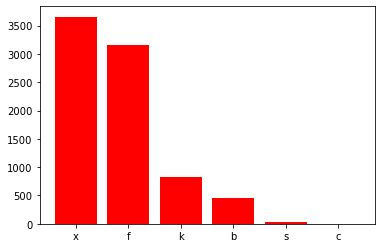

In [64]:
x = df['cap-shape'].value_counts().index
y = df['cap-shape'].value_counts()
plt.bar(x, y, color = 'red')
plt.show()

In [68]:
data = df.loc[:,'cap-shape':'habitat']
data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [74]:
target = df['class']
data = np.array(data)
target

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [77]:
target = np.array(target)
data, target

(array([['x', 's', 'n', ..., 'k', 's', 'u'],
        ['x', 's', 'y', ..., 'n', 'n', 'g'],
        ['b', 's', 'w', ..., 'n', 'n', 'm'],
        ...,
        ['f', 's', 'n', ..., 'b', 'c', 'l'],
        ['k', 'y', 'n', ..., 'w', 'v', 'l'],
        ['x', 's', 'n', ..., 'o', 'c', 'l']], dtype=object),
 array(['p', 'e', 'e', ..., 'e', 'p', 'e'], dtype=object))

In [87]:
data.shape, target.shape

((8124, 22), (8124,))

In [80]:
np.unique(data[:,0], return_counts=True)

(array(['b', 'c', 'f', 'k', 's', 'x'], dtype=object),
 array([ 452,    4, 3152,  828,   32, 3656], dtype=int64))

In [85]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [88]:
for i in range(len(data[0])):
    data[:,i] = LE.fit_transform(data[:,i])
target = LE.fit_transform(target)

data, target

(array([[5, 2, 4, ..., 2, 3, 5],
        [5, 2, 9, ..., 3, 2, 1],
        [0, 2, 8, ..., 3, 2, 3],
        ...,
        [2, 2, 4, ..., 0, 1, 2],
        [3, 3, 4, ..., 7, 4, 2],
        [5, 2, 4, ..., 4, 1, 2]], dtype=object),
 array([1, 0, 0, ..., 0, 1, 0], dtype=int64))

In [89]:
from sklearn.naive_bayes import CategoricalNB
CNB = CategoricalNB()
CNB.fit(data, target)

print(CNB.score(data, target))

0.9566715903495815


In [93]:
# train, test 분리
from sklearn.model_selection import train_test_split
# stratify=
train_data, test_data, train_target, test_target = train_test_split(data, target, stratify=target, random_state = 42)

In [94]:
train_data.shape, test_data.shape, train_target.shape, test_target.shape

((6093, 22), (2031, 22), (6093,), (2031,))

In [96]:
from sklearn.naive_bayes import CategoricalNB
CNB = CategoricalNB()
CNB.fit(train_data, train_target)

print(CNB.score(test_data, test_target))
print(CNB.score(train_data, train_target))

0.9527326440177253
0.9537173806006893


In [97]:
print(CNB.predict(test_data[:20]))
print(test_target[:20])

[0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0]
[0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0]
